In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

from geocat.viz import util as gvutil
import geocat.datafiles as gdf

res = xr.open_dataset(gdf.get('netcdf_files/tpom000.partial.nc'))
atmos = xr.open_dataset(gdf.get('netcdf_files/atmos.nc'), decode_times=False)

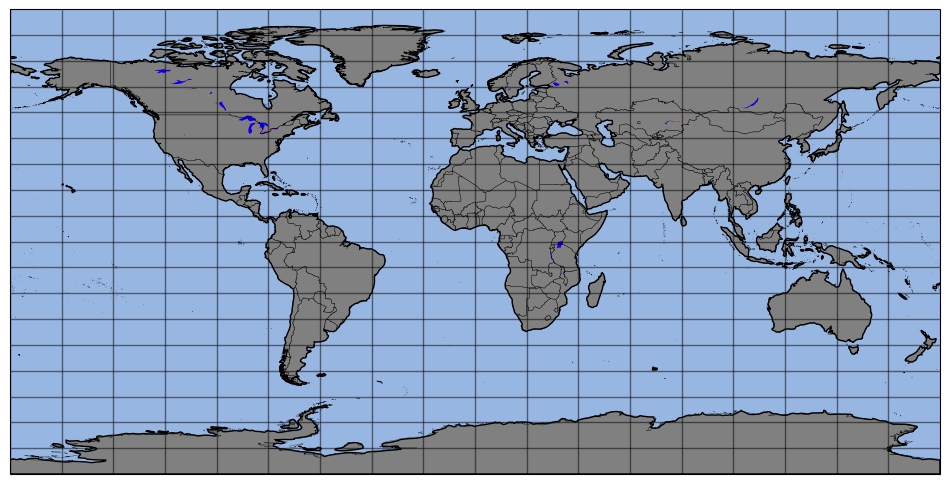

In [8]:
# figure object
plt.figure(figsize=(12,8))
# an axis
ax = plt.axes(projection=ccrs.PlateCarree())

# User different projections

# Add feature
ax.add_feature(cfeature.LAND, edgecolor='k', facecolor='grey', zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='orange', linewidth=0.2, facecolor='blue')
ax.add_feature(cfeature.OCEAN)

# Add border lines over countries
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name='admin_0_countries',
                                            scale='10m',
                                            facecolor='none',
                                            edgecolor='black',
                                            linewidth=0.2))
# lat/lon gridlines
# Draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='k', alpha=0.5)

# gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,10))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 20))



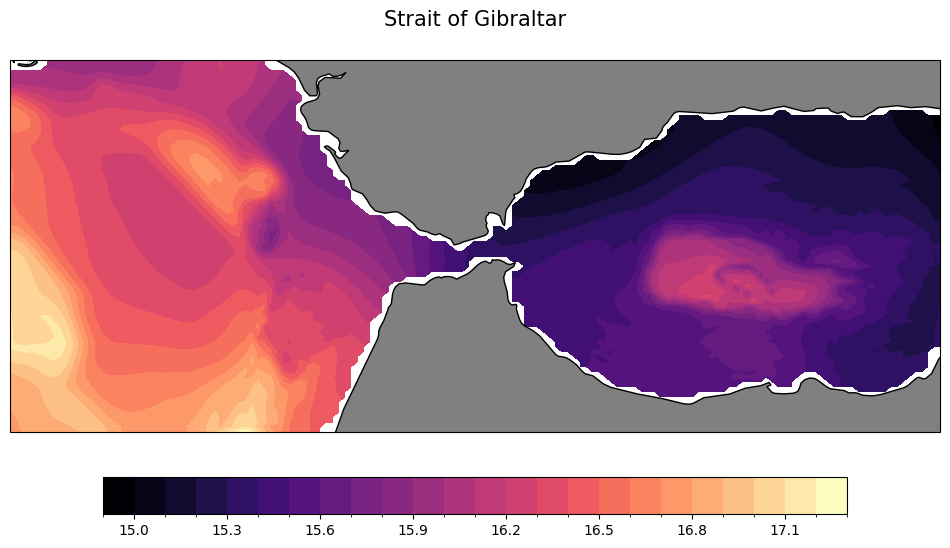

In [13]:
# Extract a specific time 'slice' of data
t = res.t

fig = plt.figure(figsize=(12,8))

proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines('10m')
ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='grey')
# plot data
temp = t.plot.contourf(ax=ax,
                       transform=proj,
                       levels=25,
                       vmin=14.9,
                       vmax=17.3,
                       cmap='magma',
                       add_colorbar=False)
cbar_ticks = np.arange(15, 17.3, 0.3)
cbar = plt.colorbar(temp,
                    orientation='horizontal',
                    shrink=0.8,
                    pad=0.073,
                    extendrect=True,
                    ticks=cbar_ticks)
cbar.ax.tick_params(labelsize=10)

# title
plt.title('Strait of Gibraltar', x=.5, y=1.07, fontsize=15)
plt.show()

In [26]:
t = atmos.TS.isel(time=0)

t = gvutil.xr_add_cyclic_longitudes(t, 'lon')

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.Orthographic())

ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='black', linewidth=0.2, zorder=3)
states = cfeature.NaturalEarthFeature(category='physical',
                                      name='bathymetry',
                                      scale='50m',
                                      facecolor='none',
                                      edgecolor='grey',
                                      linewidth=0.2)
#ax.coastlines('50m')
ax.add_feature(states)
# bath = cfeature.NaturalEarthFeature(category='physical',
#                                     name='bathymetry',
#                                     scale='10m')
ax.add_feature(bath)
t.plot.contourf(ax=ax,
                transform=ccrs.PlateCarree(),
                levels=12,
                cmap='viridis',
                add_colorbar=False)

ax.add_feature(cfeature.LAKES, facecolor='lightgrey')
plt.show()

/user/home/nd20983/.local/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_bathymetry.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


HTTPError: HTTP Error 404: Not Found

<Figure size 1200x1200 with 1 Axes>